In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [3]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    "Shows input images by stacking them in num_cols columns"
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(cmap == "gray" or cmap == 'hot'):
            ax.imshow(image, cmap=cmap)
        elif(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)
    plt.show()

In [4]:
km = []
neg = []
import glob
# km_sign_im = glob.glob('F:/Manhattan Project/final_data/ANNOTATED_KM/*.jpg')
# negatives_im = glob.glob('F:/Manhattan Project/final_data/ANNOTATED_NEG/*.jpg')

km_sign_im = glob.glob(' positive samples folder*.jpg')
negatives_im = glob.glob('Negative samples folder*.jpg')
  

for image in km_sign_im:
    km.append(image)
    
    
for image in negatives_im:
    neg.append(image)
    
data_info = data_look(km, neg)

In [ ]:
import random
num_images = 10
km_samples = random.sample(list(km), num_images)
neg_samples = random.sample(list(neg), num_images)

In [48]:
km_images = []
Neg_images = []

Example Car images


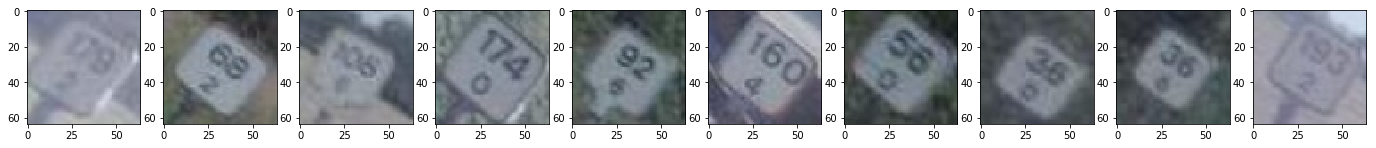

Example not-car images


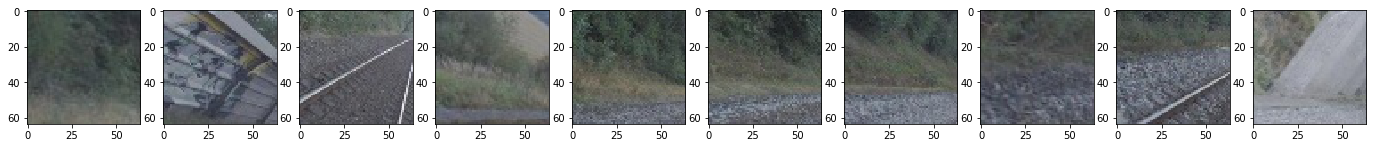

In [49]:
for sample in km_samples:
    km_images.append(mpimg.imread(sample))
    
for sample in neg_samples:
    neg_images.append(mpimg.imread(sample))

visualize_images(km_images, num_images, "Example km images")
visualize_images(neg_images, num_images, "Example neg images")

In [50]:
import cv2 
import random

def translate_image(image, pos_range=2):
    """Perturbs the image by translating the image by - pos_range to + pos_range pixels"""
    rows, cols = image.shape[:2] 
    pos_x = pos_range * np.random.uniform() - pos_range/2
    pos_y = pos_range * np.random.uniform() - pos_range/2
    pos_M = np.float32([[1, 0, pos_x],[0, 1, pos_y]])

    return cv2.warpAffine(image, pos_M, (cols,rows))

def scale_image(image, scale = [1.0, 1.1, 1.2]):
    """Perturbs the image by the scale randomly selected from the 'scale' array"""
    scale_M = random.sample(scale, 1)[0]
    image = cv2.resize(image, None, fx = scale_M, fy = scale_M, interpolation = cv2.INTER_AREA)
    return image[0:64, 0:64, :]

def rotate_image(image, rot_range = 2):
    """Perturbs the image by rotation it by an angle randomly selected from rot_rangle"""
    rows, cols = image.shape[:2] 
    rot = np.random.uniform(rot_range)- rot_range/2
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), rot, 1)
    
    return cv2.warpAffine(image, rot_M, (cols,rows))

def affine_image(image, affine_range = 2):
    #Affine Transform
    rows, cols = image.shape[:2] 
    pts1 = np.float32([[5, 5],[10, 5],[5, 10]])

    pt1 = 5 + affine_range * np.random.uniform() - affine_range/2
    pt2 = 10 + affine_range * np.random.uniform() - affine_range/2

    pts2 = np.float32([[pt1, 5],[pt2, pt1],[5, pt2]])

    affine_M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, affine_M, (cols,rows))

def transform_image(image, pos_range = 2, rot_range = 2, scale = [1, 1.1], affine_range = 2):    
    image = translate_image(image, pos_range=5) 
    image = rotate_image(image, rot_range = 5)
    image = scale_image(image, scale = [1.2, 1.4, 1.0])
    is_blurred = random.sample([0, 1], 1)
    if is_blurred[0]:
        image = cv2.GaussianBlur(image,(3,3),0)

    return image

In [18]:
def convert_color(img, conv='RGB2YCrCb'):
    """
    Convert the image from one color space to the other
    """
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'Gray':
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3))/255, edgecolors='none')
    return ax 

Text(0.5, 1.0, 'YUV')

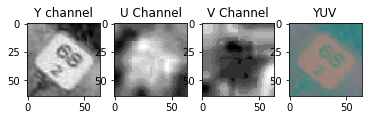

In [54]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'RGB2YUV')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('Y channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('U Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('V Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('YUV')

Text(0.5, 1.0, 'HSV')

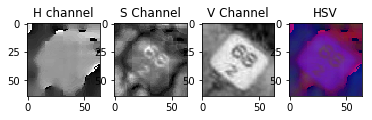

In [55]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'RGB2HSV')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('H channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('S Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('V Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('HSV')

Text(0.5, 1.0, 'LUV')

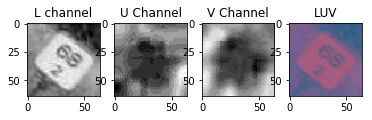

In [56]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'RGB2LUV')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('L channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('U Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('V Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('LUV')

Text(0.5, 1.0, 'YCrCb')

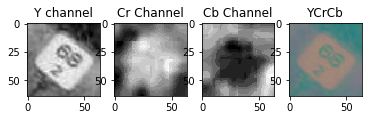

In [57]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'BGR2YCrCb')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('Y channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('Cr Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('Cb Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('YCrCb')

Text(0.5, 1.0, 'HLS')

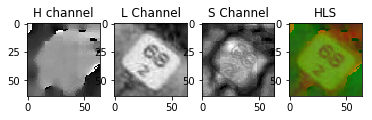

In [58]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'RGB2HLS')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('H channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('L Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('S Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('HLS')

Text(0.5, 1.0, 'HLS')

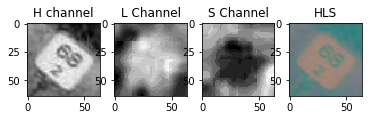

In [59]:
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(km_images[1], 'BGR2YCrCb')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('H channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('L Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('S Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('HLS')

In [21]:
from skimage.feature import hog
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Text(0.5, 1.0, 'not car HOG Visualization')

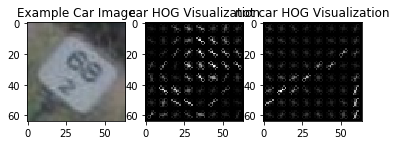

In [67]:
orient = 12
pix_per_cell = 8
cell_per_block = 2
km_features, hog_image = get_hog_features(cv2.cvtColor(km_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

neg_features, neg_hog_image = get_hog_features(cv2.cvtColor(neg_images[2], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
fig = plt.figure()
plt.subplot(131)
plt.imshow(km_images[1])
plt.title('Example km Image')
plt.subplot(132)
plt.imshow(hog_image, cmap='gray')
plt.title('km HOG Visualization')
plt.subplot(133)
plt.imshow(neg_hog_image, cmap='gray')
plt.title('Neg HOG Visualization')

In [22]:
def bin_spatial(img, size=(64, 64)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [23]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features

In [24]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=False, hist_feat=False, hog_feat=True):
    features = []
    for file in imgs:
        file_features = []
        image = mpimg.imread(file)
        image = (image * 255).astype(np.uint8)
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)   
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    return features

In [108]:
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
colorspace = 'YCrCb' 
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size=(64,64)
hist_bins=64
t=time.time()
km_features = extract_features(km, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
neg_features = extract_features(neg, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
X = np.vstack((km_features, neg_features)).astype(np.float64) 
print(X.shape)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(km_features)), np.zeros(len(neg_features))))
print(len(y))
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.15, random_state=rand_state)
#X_train, X_test = shuffle(X_train, y_train, random_state=rand_state)
# # Compute a PCA  on the features 
# n_components = 4932

# print("Extracting the top %d features from %d total features"
#       % (n_components, X_train.shape[1]))

# pca = PCA(n_components=n_components, svd_solver='randomized',
#           whiten=True).fit(X_train)

# X_train_pca = pca.transform(X_train)
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
svc = svm.SVC(kernel='rbf')
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

2.13 Seconds to extract HOG features...
(492, 5292)
492
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5292
0.08 Seconds to train SVC...


In [112]:
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  1.0
My SVC predicts:  [1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]
For these 10 labels:  [1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]
0.00183 Seconds to predict 10 labels with SVC


In [ ]:
import pickle
import os
data_file = '../results/model/svcc_new.p'

if not os.path.isfile(data_file):
    with open(data_file, 'wb') as pfile:
        pickle.dump(
            {
                'svc': svc,
                'scaler': X_scaler,
                'orient': orient,
                'pix_per_cell': pix_per_cell,
                'cell_per_block': cell_per_block,
                'spatial_size': spatial_size,
                'hist_bins': hist_bins
            },
            pfile, pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
dist_pickle = pickle.load( open("../results/model/svcc_new.p", "rb" ) )
print(dist_pickle)
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

In [42]:
test_images_dir = 'image folder'
test_images = []
images = glob.glob(test_images_dir + '*.jpg')
for image in images:
        test_images.append(mpimg.imread(image))

In [43]:
def find_km(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis_bboxes = False):
    draw_img = np.copy(img)
    xstart = int(img.shape[1]/5)
    xstop = img.shape[1]
    img_tosearch = img[ystart:ystop, xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    rectangles = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3)).reshape(1, -1)
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            test_features = X_scaler.transform(hog_features)   
            test_prediction = svc.predict(test_features)
            if test_prediction == 1 or vis_bboxes == True:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart)))           
    return rectangles

In [44]:
def get_rectangles(image, scales = [1, 1.5, 2, 2.5, 3], 
                   ystarts = [200, 250, 450, 450, 460], 
                   ystops = [528, 550, 620, 650, 700]):
    out_rectangles = []
    for scale, ystart, ystop in zip(scales, ystarts, ystops):
        rectangles = find_km(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        if len(rectangles) > 0:
            out_rectangles.append(rectangles)
    out_rectangles = [item for sublist in out_rectangles for item in sublist] 
    return out_rectangles

In [45]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

In [46]:
def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

In [47]:
def draw_labeled_bboxes(img, labels):
    img_copy = np.copy(img)
    result_rectangles = []
    for km_number in range(1, labels[1]+1):
        nonzero = (labels[0] == km_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        area = (bbox[1][1] - bbox[0][1]) * (bbox[1][0] - bbox[0][0])
        if area > 40 * 40:
            result_rectangles.append(bbox)
            cv2.rectangle(img_copy, bbox[0], bbox[1], (0,255,0), 6)
    return result_rectangles, img_copy

In [48]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    random_color = False
    for bbox in bboxes:
        if color == 'random' or random_color:
            color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
            random_color = True
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy

C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', s

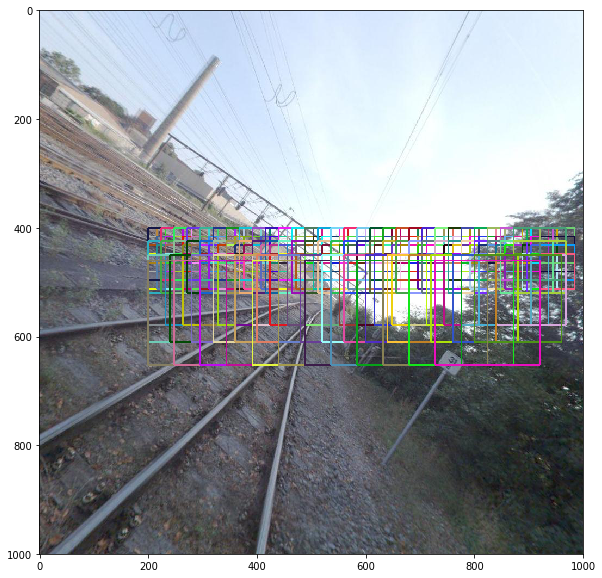

In [49]:
def visualize_bboxes(image, scales = [1, 1.5, 2, 2.5, 3], 
                   ystarts = [400, 400, 450, 450, 460], 
                   ystops = [528, 550, 620, 650, 700]):
    out_rectangles = []
    for scale, ystart, ystop in zip(scales, ystarts, ystops):
        rectangles = find_km(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis_bboxes = True)
        if len(rectangles) > 0:
            out_rectangles.append(rectangles)
    out_rectangles = [item for sublist in out_rectangles for item in sublist] 

    plt.figure(figsize=(20,10))
    plt.imshow(draw_boxes(image, out_rectangles, color='random', thick=2))
visualize_bboxes(test_images[0])


In [50]:
from scipy.ndimage.measurements import label
result_images = []
result_boxes = []
heatmap_images = []
result_img_all_boxes = []
for test_image in test_images:
    rectangles = get_rectangles(test_image)
    result_img_all_boxes.append(draw_boxes(test_image, rectangles, color='random', thick=3))
    heatmap_image = np.zeros_like(test_image[:, :, 0])
    heatmap_image = add_heat(heatmap_image, rectangles)
    heatmap_images.append(heatmap_image)
    heatmap_image = apply_threshold(heatmap_image, 0.5)
    labels = label(heatmap_image)
    rectangles, result_image = draw_labeled_bboxes(test_image, labels)
    result_boxes.append(rectangles)
    result_images.append(result_image)

C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\athit\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', s

error: OpenCV(3.4.4) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


test


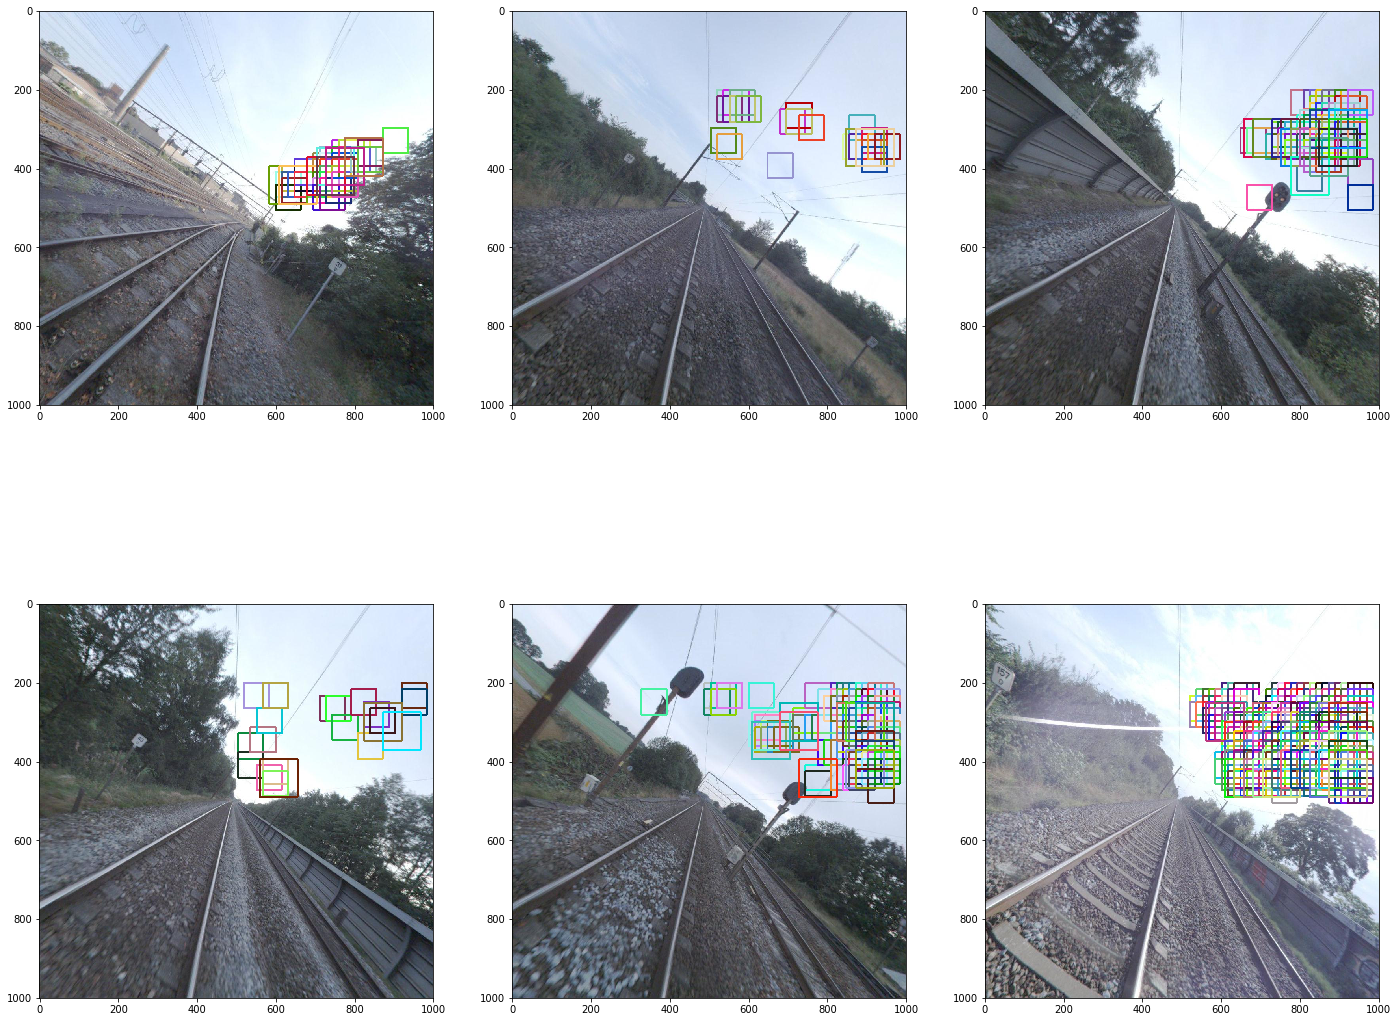

In [51]:
visualize_images(result_img_all_boxes, 3, "test")

test


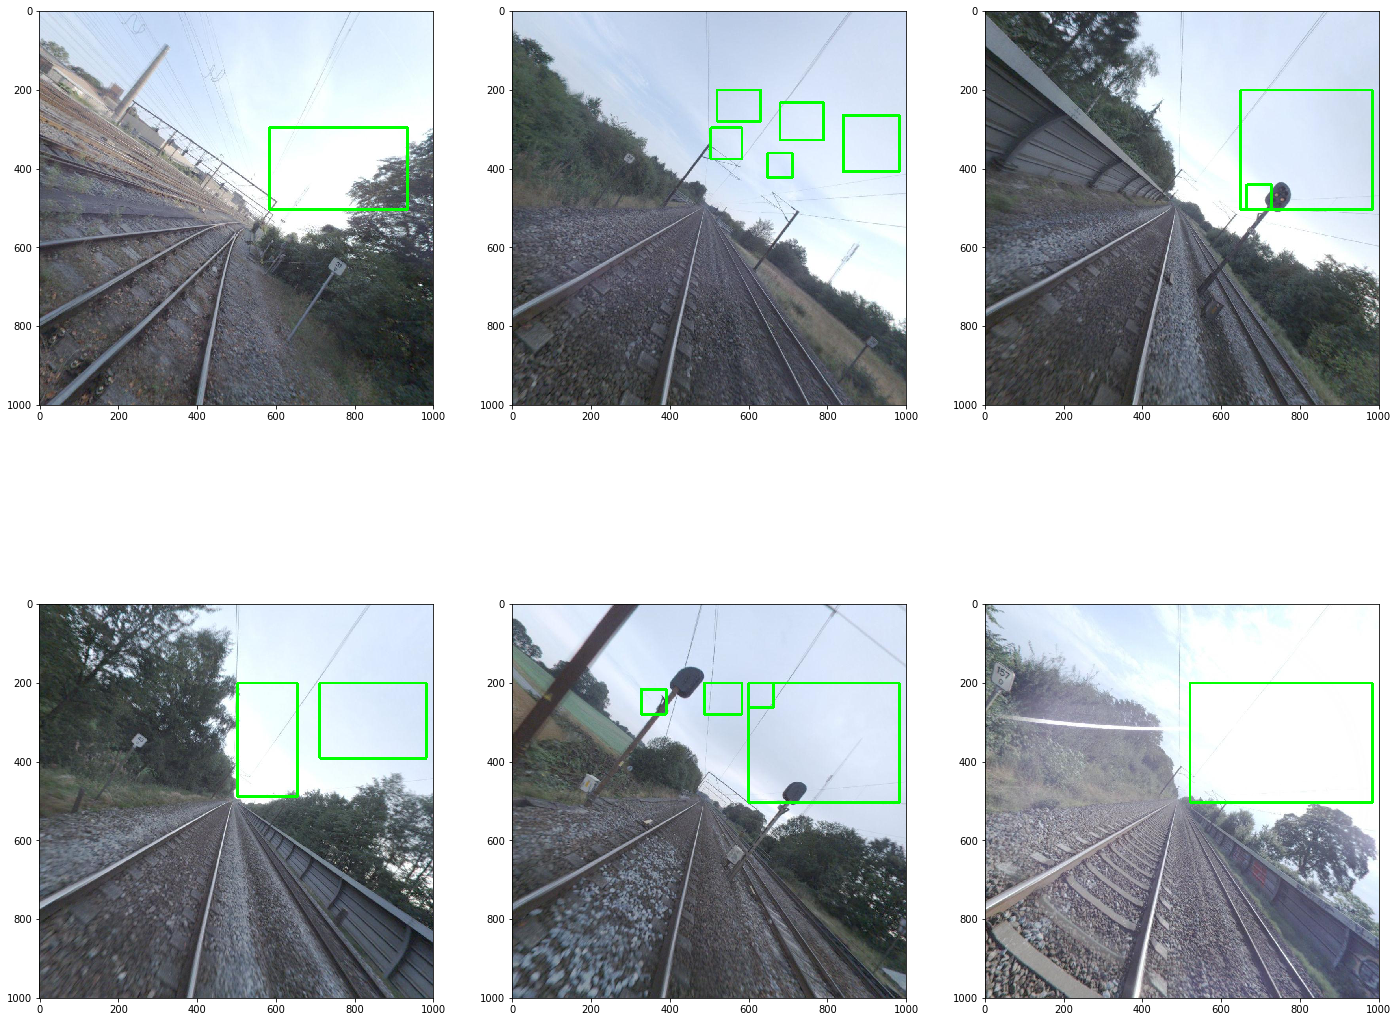

In [52]:
visualize_images(result_images, 3, "test")

Heatmap


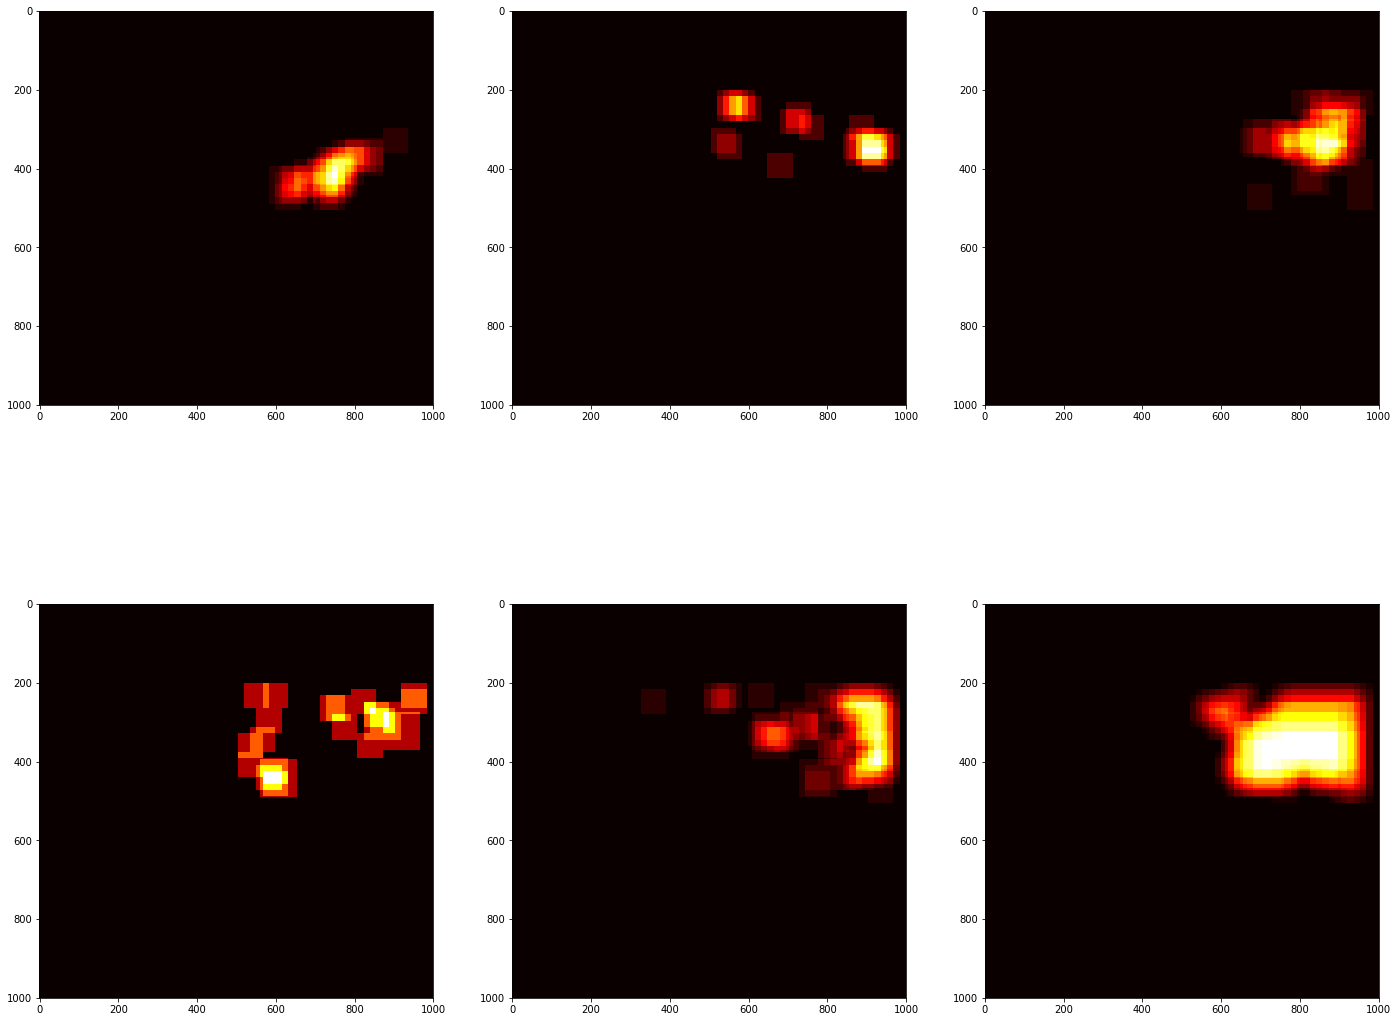

In [53]:
visualize_images(heatmap_images, 3, "Heatmap", cmap="hot")
